# Assignment 1: Part C (Modelling)

## 1. Problem DescripTIon

This stage aims to build a predictive model to analyze the impact of extreme weather events on the per-unit area income of major crops in the United States (silage corn and soybeans). In the first two stages (Assessment 1A and 1B), we have constructed a state-level merged dataset containing the following: 
- Statistical counts of four types of extreme weather events (Hail, TVS, MDA, Lightning)
- Unit price, output and income of crops in each state (Silage corn and Soybean) 
We hope to assess the predictive power of these weather features on economic performance through machine learning models, and further explain which extreme weather types have the greatest impact on different crops.

In [1]:

import pandas as pd

final_data = pd.read_csv("final_data.csv")

print(final_data.columns)
final_data.head()


Index(['State', 'Corn_Yield', 'Corn_Revenue', 'Soy_Yield', 'Soy_Price',
       'Soy_Revenue', 'Hail_Count', 'TVS_Count', 'MDA_Count',
       'Lightning_Count'],
      dtype='object')


,State,Corn_Yield,Corn_Revenue,Soy_Yield,Soy_Price,Soy_Revenue,Hail_Count,TVS_Count,MDA_Count,Lightning_Count
0,AK,0.0,0.00,0.0,0.0,0.0,16192,341.0,4733,0.0
1,AL,16.0,77.12,31.0,10.2,316.2,416475,461.0,26057,43323.0
2,AR,20.0,88.40,55.0,10.2,561.0,279885,735.0,27816,41497.0
3,AZ,27.0,115.02,0.0,0.0,0.0,200210,104.0,3888,51981.0
4,CA,26.0,117.00,0.0,0.0,0.0,44338,911.0,85896,8441.0



## 2. Explanation of Input and Output Variables

We will construct the modeling structure in the following way: 
- Input features (X): - Hail_Count
- TVS_Count
- MDA_Count
- Lightning_Count

- Output Variables (y):
- Corn_Revenue (for Model 1)
- Soy_Revenue (for Model 2) 
We will establish independent models for the two crops respectively to ensure interpretability and comparability.

In [3]:

features = ['Hail_Count', 'TVS_Count', 'MDA_Count', 'Lightning_Count']
X = final_data[features]
y_corn = final_data['Corn_Revenue']
y_soy = final_data['Soy_Revenue']


## 3. Model selection and modeling process

To comprehensively evaluate the predictive ability of extreme weather events on crop income, we selected five common regression models for comparison: 
1. **Linear Regression**: Serves as a baseline model to determine if a linear relationship exists.
2. **Decision Tree Regressor**: Suitable for nonlinear modeling and highly interpretable.
3. **Random Forest Regressor**: An ensemble method with strong generalization capabilities.
4. **XGBoost Regressor**: A high-performance model, ideal for tabular data.
5. **Support Vector Regression (SVR)**: Appropriate for nonlinear modeling with small to medium-sized datasets. 
We will respectively predict `Corn_Revenue` and `Soy_Revenue`, and compare the performance of each model.

In [4]:

from sklearn.model_selection import train_test_split

X_train_corn, X_test_corn, y_train_corn, y_test_corn = train_test_split(X, y_corn, test_size=0.2, random_state=42)
X_train_soy, X_test_soy, y_train_soy, y_test_soy = train_test_split(X, y_soy, test_size=0.2, random_state=42)


In [7]:

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

models = {
    "Linear": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42),
    "XGBoost": XGBRegressor(random_state=42, verbosity=0),
    "SVR": SVR()
}



## 4. data preprocessing

Before modeling, we performed the following preprocessing operations on the data: 
- **Missing Value Handling**: Since all fields in `final_data.csv` are aggregated statistics and the processing has ensured completeness, there is no need to fill in missing values additionally.
- **Feature Scaling**:
- For models such as linear regression and support vector regression (SVR), the numerical range of input features may affect the prediction results.
- We used `StandardScaler` to standardize the four input features (Hail, TVS, MDA, Lightning count) in `X` (with a mean of 0 and a variance of 1).
- Tree models (such as decision trees, random forests, and XGBoost) are not sensitive to scaling, so we did not apply scaled features to them.
- **Data Splitting**: For each prediction target (Corn_Revenue and Soy_Revenue), the training set and test set were separately divided, with a ratio of 80%/20%. 
This step provides a clean, consistent and well-adapted input feature space for model training.

In [8]:

from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


X_train_corn_std, X_test_corn_std, _, _ = train_test_split(X_scaled, y_corn, test_size=0.2, random_state=42)
X_train_soy_std, X_test_soy_std, _, _ = train_test_split(X_scaled, y_soy, test_size=0.2, random_state=42)



## 5. Model Training and Evaluation

We will use the following five metrics to evaluate the performance of each model on the test set: 
- **R² (Coefficient of Determination)**: Reflects the model's ability to explain variance.
- **Mean Squared Error (MSE)**
- **Root Mean Squared Error (RMSE)**
- **Mean Absolute Error (MAE)**
- **Mean Absolute Percentage Error (MAPE)** 
Each model will be used separately to predict `Corn_Revenue` and `Soy_Revenue`, and the evaluation results will be organized into a table for comparison.

In [21]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import pandas as pd

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    nonzero = y_true != 0
    return np.mean(np.abs((y_true[nonzero] - y_pred[nonzero]) / y_true[nonzero])) * 100


results = []

# Training and Evaluation
for name, model in models.items():
    if name in ['Linear', 'SVR']:
        model.fit(X_train_corn_std, y_train_corn)
        preds = model.predict(X_test_corn_std)
    else:
        model.fit(X_train_corn, y_train_corn)
        preds = model.predict(X_test_corn)

    r2 = r2_score(y_test_corn, preds)
    mse = mean_squared_error(y_test_corn, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_corn, preds)
    mape = mean_absolute_percentage_error(y_test_corn, preds)

    results.append([name, round(r2, 4), round(mse, 2), round(rmse, 2), round(mae, 2), round(mape, 2)])

# DataFrame
results_df = pd.DataFrame(results, columns=["Model", "R2", "MSE", "RMSE", "MAE", "MAPE"])
print(" Corn_Revenue predicting results：")
print(results_df)


 Corn_Revenue predicting results：
          Model      R2     MSE   RMSE    MAE   MAPE
0        Linear -0.6400  699.31  26.44  19.94  20.16
1  DecisionTree -0.3634  581.36  24.11  20.82  23.87
2  RandomForest -0.2434  530.19  23.03  19.17  20.02
3       XGBoost -0.4043  598.82  24.47  21.15  23.06
4           SVR -0.4282  609.00  24.68  16.19  14.75



## 6. The performance of the model on Soy_Revenue

We will use the same methods and metrics to predict `Soy_Revenue` for each model and record its performance.


In [22]:

results_soy = []

for name, model in models.items():
    if name in ['Linear', 'SVR']:
        model.fit(X_train_soy_std, y_train_soy)
        preds = model.predict(X_test_soy_std)
    else:
        model.fit(X_train_soy, y_train_soy)
        preds = model.predict(X_test_soy)

    r2 = r2_score(y_test_soy, preds)
    mse = mean_squared_error(y_test_soy, preds)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_test_soy, preds)
    mape = mean_absolute_percentage_error(y_test_soy, preds)

    results_soy.append([name, round(r2, 4), round(mse, 2), round(rmse, 2), round(mae, 2), round(mape, 2)])

results_soy_df = pd.DataFrame(results_soy, columns=["Model", "R2", "MSE", "RMSE", "MAE", "MAPE"])
print(" Soy_Revenue predicting results：")
print(results_soy_df)


 Soy_Revenue predicting results：
          Model      R2        MSE    RMSE     MAE   MAPE
0        Linear -0.4305   78707.19  280.55  224.04  65.40
1  DecisionTree -0.9727  108533.95  329.44  279.00  50.88
2  RandomForest  0.2660   40383.92  200.96  179.48  40.77
3       XGBoost -0.2305   67701.99  260.20  204.36  22.62
4           SVR -0.1849   65194.16  255.33  219.07  22.51



From the above table, it can be observed that the R² scores of different models on `Soy_Revenue` are generally low, and some are even negative, indicating that the current models have difficulty capturing effective predictive patterns. The possible reasons for this are analyzed as follows: 
- **Limited sample size**: The data used is at the state level, with only about 50 observations, which is insufficient to support the learning of complex models for underlying patterns.
- **Low dimensionality of input features**: It only includes four types of weather statistics, failing to cover core factors influencing yield and income, such as temperature, precipitation, soil quality, and planting techniques.
- **Insufficient variable correlation**: Initial checks revealed that most weather variables have weak linear or nonlinear correlations with yield/income, making it difficult for the model to learn useful patterns.
- **Extreme values / Imbalanced distribution**: Some states, such as TX and OK, experience extreme weather events much more frequently than others, which may affect model stability.
- **Information loss due to data aggregation**: State-level aggregation masks the detailed weather-crop impact at a more granular level. 
Despite the overall weak performance, we still retain the exploration of feature importance and attempt to enhance the generalization ability through model tuning.型调优提升泛化能力。


### 7. Model Optimization: Parameter Tuning of Random Forest

To enhance the model's performance , we conducted hyperparameter tuning on the Random Forest regressor. The `GridSearchCV` method was employed, with the following parameter grid set: 
- `n_estimators`: [50, 100, 200]
- `max_depth`: [None, 3, 5, 10]
- `min_samples_split`: [2, 5, 10]

We conducted a 5-fold cross-validation on the training set of `Corn_Revenue` to find the optimal parameter combination and report the average R² score of the cross-validation.


In [25]:
from sklearn.model_selection import GridSearchCV

rf_param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 3, 5, 10],
    'min_samples_split': [2, 5, 10]
}

grid_rf = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)


grid_rf.fit(X_train_corn, y_train_corn)


print(" The best combination of parameters（Random Forest）:", grid_rf.best_params_)
print(" Cross-validation score（R²）:", round(grid_rf.best_score_, 4))


 The best combination of parameters（Random Forest）: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
 Cross-validation score（R²）: -0.5959


In [26]:
from sklearn.svm import SVR

param_grid_svr = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

svr = SVR()
grid_svr = GridSearchCV(svr, param_grid_svr, cv=5, scoring='r2', n_jobs=-1)
grid_svr.fit(X_train_corn_std, y_train_corn)  

print("The best combination of parameters (SVR):", grid_svr.best_params_)
print(" Cross-validation score (R²):", round(grid_svr.best_score_, 4))


The best combination of parameters (SVR): {'C': 0.1, 'gamma': 'auto', 'kernel': 'rbf'}
 Cross-validation score (R²): -0.2044


In [27]:
from sklearn.tree import DecisionTreeRegressor

param_grid_dt = {
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10]
}

dt = DecisionTreeRegressor(random_state=42)
grid_dt = GridSearchCV(dt, param_grid_dt, cv=5, scoring='r2', n_jobs=-1)
grid_dt.fit(X_train_corn, y_train_corn)

print("The best combination of parameters (Decision Tree):", grid_dt.best_params_)
print("Cross-validation score (R²):", round(grid_dt.best_score_, 4))


The best combination of parameters (Decision Tree): {'max_depth': 3, 'min_samples_split': 10}
Cross-validation score (R²): -1.2097


### 7. Model Optimization: Parameter Tuning of Random Forest for Soybean Income Prediction
We also used `GridSearchCV` to tune the hyperparameters of the prediction model for `Soy_Revenue`, with the parameter grid being the same as that for corn. 
- `n_estimators`: [50, 100, 200]
- `max_depth`: [None, 3, 5, 10]
- `min_samples_split`: [2, 5, 10]

Through 5-fold cross-validation, we search for the optimal parameter combination on the training set and record its average R² score.均 R² 得分。


In [28]:

grid_rf_soy = GridSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_grid=rf_param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1
)

grid_rf_soy.fit(X_train_soy, y_train_soy)


print("The best combination of parameters（Soy RF）:", grid_rf_soy.best_params_)
print("Cross-validation score（R²）:", round(grid_rf_soy.best_score_, 4))


The best combination of parameters（Soy RF）: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 200}
Cross-validation score（R²）: 0.2655


In [29]:
param_grid_svr_soy = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto'],
    'kernel': ['rbf']
}

svr_soy = SVR()
grid_svr_soy = GridSearchCV(svr_soy, param_grid_svr_soy, cv=5, scoring='r2', n_jobs=-1)
grid_svr_soy.fit(X_train_soy_std, y_train_soy)  # 注意用标准化数据！

print("The best combination of parameters (Soy SVR):", grid_svr_soy.best_params_)
print("Cross-validation score (R²):", round(grid_svr_soy.best_score_, 4))


The best combination of parameters (Soy SVR): {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Cross-validation score (R²): -0.8987


In [30]:
param_grid_dt_soy = {
    'max_depth': [3, 5, None],
    'min_samples_split': [2, 5, 10]
}

dt_soy = DecisionTreeRegressor(random_state=42)
grid_dt_soy = GridSearchCV(dt_soy, param_grid_dt_soy, cv=5, scoring='r2', n_jobs=-1)
grid_dt_soy.fit(X_train_soy, y_train_soy)

print("The best combination of parameters (Soy Decision Tree):", grid_dt_soy.best_params_)
print("Cross-validation score (R²):", round(grid_dt_soy.best_score_, 4))


The best combination of parameters (Soy Decision Tree): {'max_depth': 3, 'min_samples_split': 10}
Cross-validation score (R²): 0.1064


### 8. Model interpretability analysis: Feature importance
Based on the trained random forest model, we extracted the importance indicators of each input feature and presented them through a bar chart. This chart reflects the relative influence of four types of extreme weather events on the prediction of `Corn_Revenue`, facilitating subsequent interpretative analysis and feature selection.选。


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14380\551136615.py:18: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14380\551136615.py:18: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


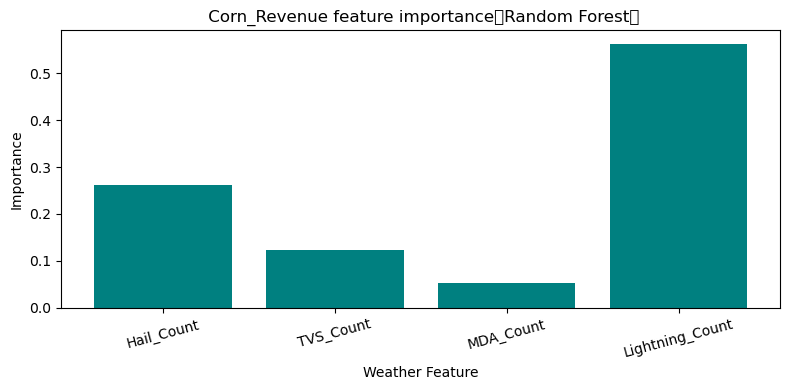

In [23]:
import matplotlib.pyplot as plt


rf_best = grid_rf.best_estimator_
rf_best.fit(X_train_corn, y_train_corn)

importances = rf_best.feature_importances_
features = X.columns

plt.figure(figsize=(8, 4))
plt.bar(features, importances, color='teal')
plt.title(" Corn_Revenue feature importance（Random Forest）")
plt.ylabel("Importance")
plt.xlabel("Weather Feature")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


### 8. Model Interpretation: Feature Importance of Soybean Income

Based on the tuned random forest model, we extracted the relative importance of four types of weather event features for `Soy_Revenue` and visualized them using a bar chart. 
It helps to reveal the differences in the impacts of extreme weather types on different crops and provides a reference for subsequent feature selection or explanatory modeling.


C:\Users\lenovo\AppData\Local\Temp\ipykernel_14380\2804855703.py:13: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\lenovo\AppData\Local\Temp\ipykernel_14380\2804855703.py:13: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65288 (\N{FULLWIDTH LEFT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
E:\Anaconda\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65289 (\N{FULLWIDTH RIGHT PARENTHESIS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


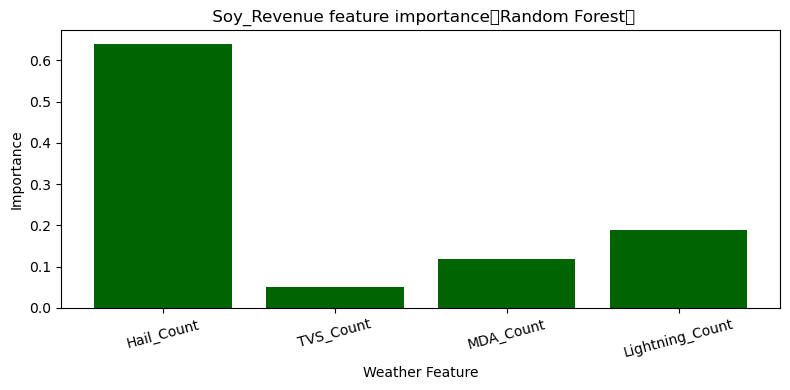

In [24]:

rf_soy = grid_rf_soy.best_estimator_
rf_soy.fit(X_train_soy, y_train_soy)

importances_soy = rf_soy.feature_importances_

plt.figure(figsize=(8, 4))
plt.bar(X.columns, importances_soy, color='darkgreen')
plt.title(" Soy_Revenue feature importance（Random Forest）")
plt.ylabel("Importance")
plt.xlabel("Weather Feature")
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()
